# General infos

In this Notebook, I'm gonna use MLP (Multi-layer perceptrons), but it is not the best model. I'm gonna use this since this Notebook is only a first look in this type of problems and complex analysis will not be applied. The mission of this paper is to make a basic model with good accuracy (96-98%)

# Logistic regression

Before trying to use more complex methods like Neural networks, let see if it's necessary, so I will try first using Logistic Regression

## Load datas

In [1]:
import pandas as pd

path = '/kaggle/input/digit-recognizer/'
digits = pd.read_csv(path+'train.csv')

X = digits.drop('label', axis=1).values
Y = digits['label'].values

digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Pics are 28x28 splitted in 783 pixels. For better understanding, I'm gonna show the first 10 samples as pics

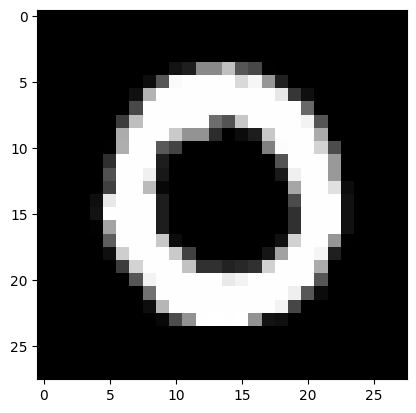

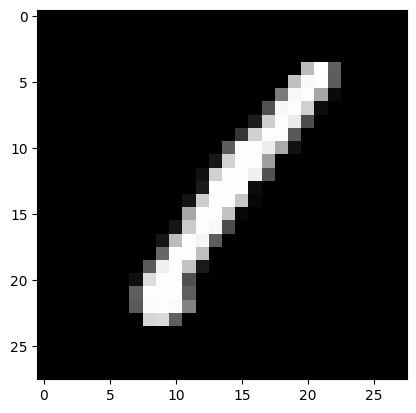

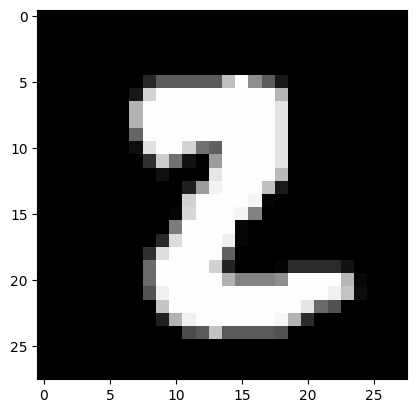

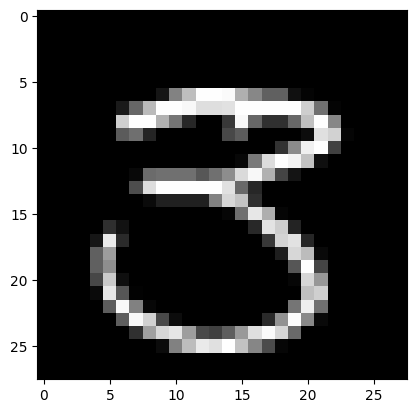

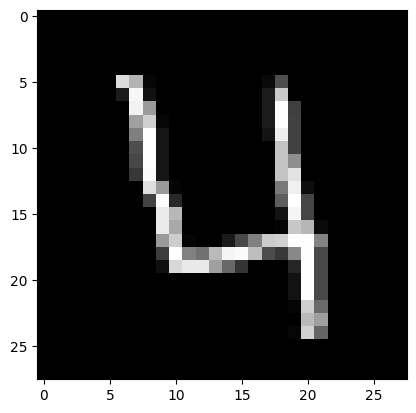

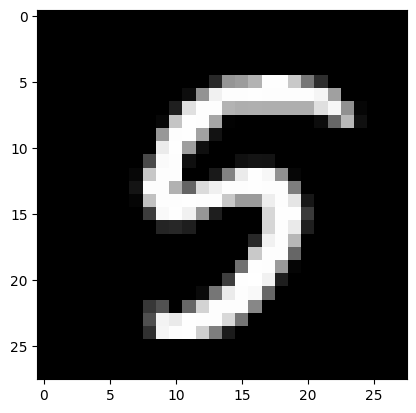

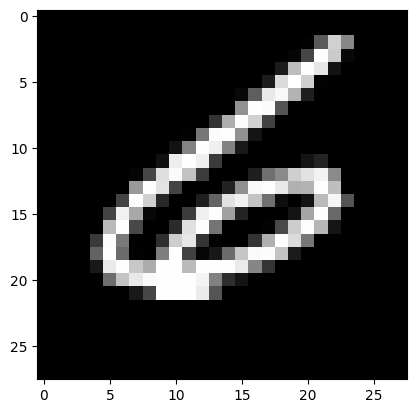

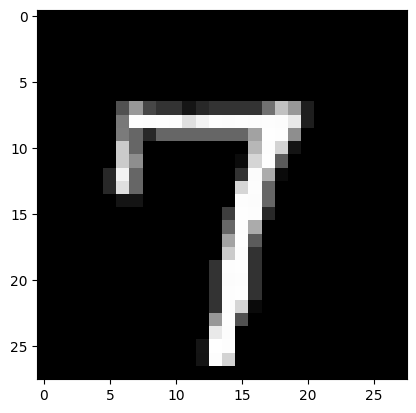

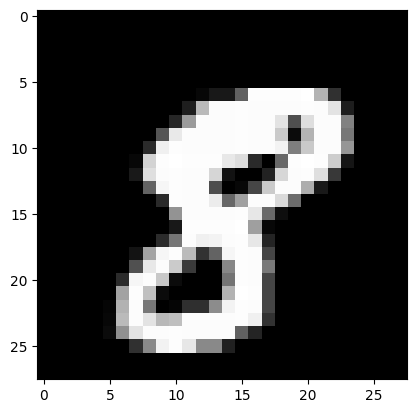

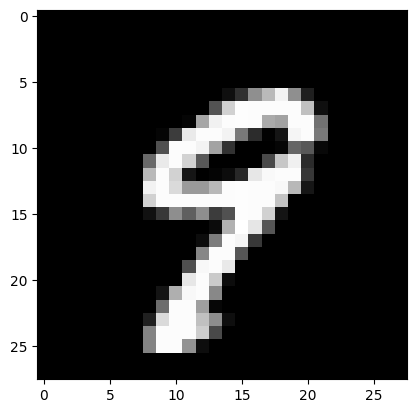

In [2]:
import matplotlib.pyplot as plt

for i in range(0,10):
    pic_matrix = X[Y==i][0].reshape(28,28)
    plt.imshow(pic_matrix, cmap='gray')
    plt.show()

# Normalization

Because every pixel have a value between 0-255, it's a good practice to normalize datas to 0-1.
I'm gonna do it in splitted datasets. Since the original dataset is small (less than 10000 samples), I'm gonna use 30% of that as test set

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

## Model

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

lr = LogisticRegression(max_iter=500)

lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
Y_proba = lr.predict_proba(X_test)
acc = accuracy_score(Y_test, Y_pred)
log = log_loss(Y_test, Y_proba)

print(acc)
print(log)

0.9125396825396825
0.32379667333802925


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We can see that Accuracy is good, but Log loss is too high. Neural networks are needed

# Neural Networks

## Load datas

In [5]:
import pandas as pd

path = '/kaggle/input/digit-recognizer/'
digits = pd.read_csv(path+'train.csv')

digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Normalization

In [6]:
from sklearn.model_selection import train_test_split

X = digits.drop('label', axis=1).values
Y = digits['label'].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

## Model

### Tuning

There are not a lot of params. The most complex hyperparams is `hidden_layer_sizes`. Since the dataset is simple enough, 1 or 2 layers is good. The number of neurons for layer can be found in a small value (50-200).  
About $\alpha$, a good practice is to try values around $10^{-4}$ and $10$

In [7]:
# Hyperparams tuning

from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier

params = {
    'hidden_layer_sizes': [(100,), (100,100), (50,50)],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]    
}

mlp = MLPClassifier()

rs = RandomizedSearchCV(
    mlp,
    params,
    cv=3,
    n_iter=10,
    scoring='neg_log_loss'
)

rs.fit(X_train, Y_train)

mlp = rs.best_estimator_
print(f'Best params: {rs.best_params_}')

Best params: {'hidden_layer_sizes': (50, 50), 'alpha': 0.1}


## Prediction

In [8]:
# Prediction

mlp.fit(X_train, Y_train)
Y_train_pred = mlp.predict(X_train)
Y_train_proba = mlp.predict_proba(X_train)
Y_pred = mlp.predict(X_test)
Y_proba = mlp.predict_proba(X_test)

from sklearn.metrics import accuracy_score, log_loss
print(f'TRAIN - Accuracy: {accuracy_score(Y_train, Y_train_pred)} , Logloss: {log_loss(Y_train, Y_train_proba)}')
print(f'TEST - Accuracy: {accuracy_score(Y_test, Y_pred)} , Logloss: {log_loss(Y_test, Y_proba)}')

TRAIN - Accuracy: 0.9991156462585034 , Logloss: 0.012785906752995187
TEST - Accuracy: 0.9688888888888889 , Logloss: 0.10891065080543141


This is a good result. In my develop test, I reached `Accuracy=0.9759523809523809` and `Logloss=0.08368947153692488` in test set and a very small difference from Training set (showing a low level of overfitting). In final Notebook, the results should be similar.

## Errors

Accuracy and log loss are pretty good, but NN are not the best model, so I'm gonna show the first 10 errors so to better analyze it's limit

Total errors: 392 (3.11 %)
Predicted: 3, Number: 1


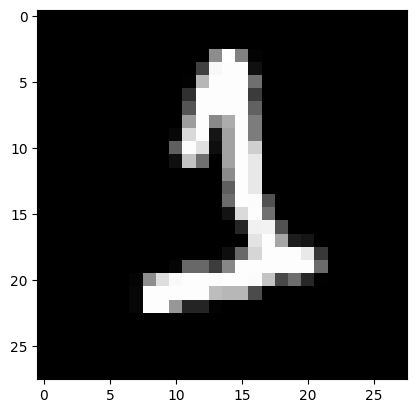

Predicted: 0, Number: 3


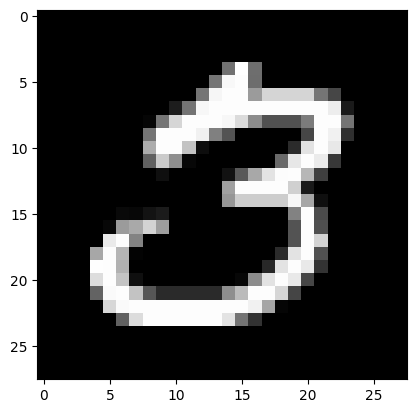

Predicted: 6, Number: 4


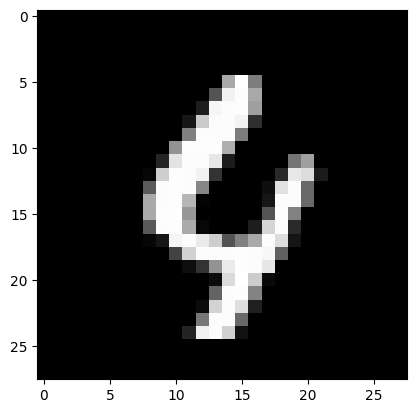

Predicted: 9, Number: 4


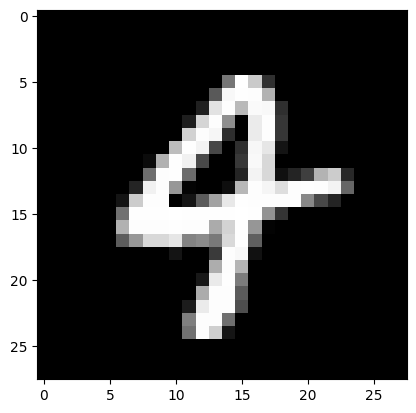

Predicted: 9, Number: 0


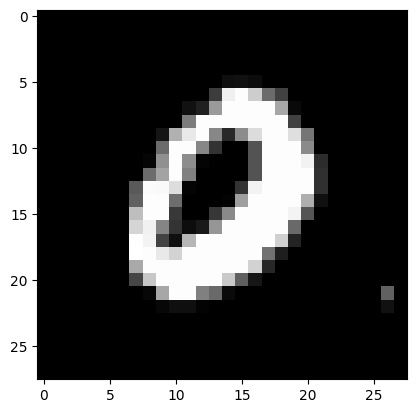

Predicted: 8, Number: 3


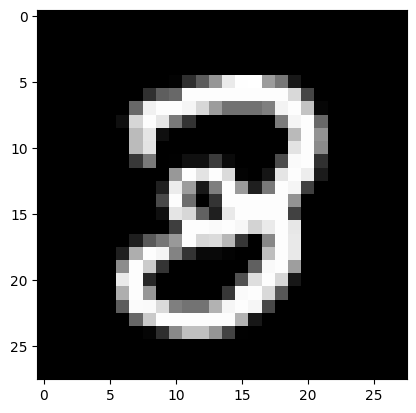

Predicted: 1, Number: 7


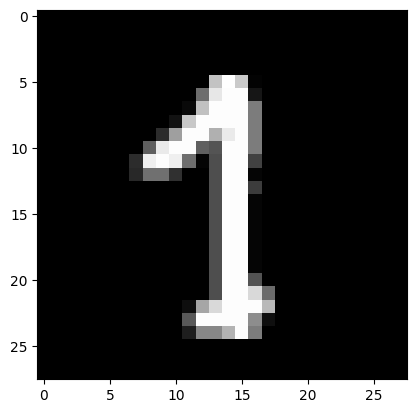

Predicted: 4, Number: 8


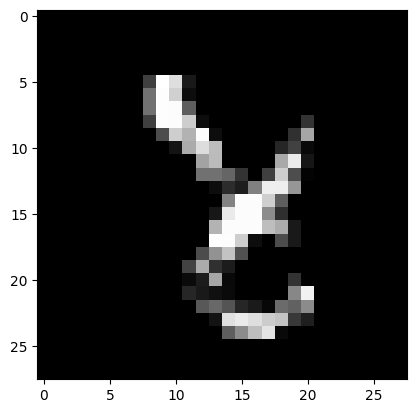

Predicted: 6, Number: 4


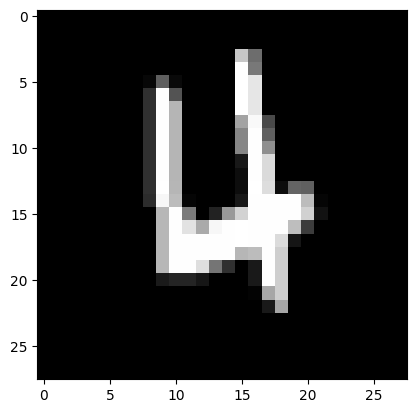

Predicted: 1, Number: 9


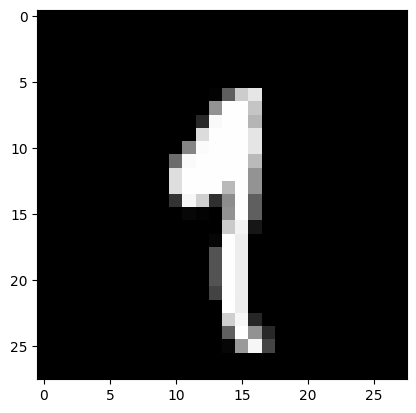

In [9]:
error_cases = Y_pred!=Y_test
error_cases = error_cases[error_cases == True]
print(f'Total errors: {len(error_cases)} ({(len(error_cases)/len(X_test)*100):.2f} %)')
errors = 0
for i in range(0,len(X_test)):
    if(Y_pred[i] != Y_test[i]):
        print(f'Predicted: {Y_pred[i]}, Number: {Y_test[i]}')
        plt.imshow(X_test[i].reshape(28,28), cmap='gray')
        plt.show()
        errors += 1
    if errors == 10:
        break

As we can see, some of those numbers was not so hard to be predicted, but the error percentage is low so we can improve it with better models

## Refit in full set

Before commiting the final result, since train dataset is small, I'm gonna re-fit the already optimized model using all training set to better understand relations.

In [10]:
X = mms.transform(X)
mlp.fit(X, Y)

MLPClassifier(alpha=0.1, hidden_layer_sizes=(50, 50))

## Output

In [11]:
import pandas as pd

path = '/kaggle/input/digit-recognizer/'
outpath = '/kaggle/working/'

digit_test = pd.read_csv(path+'test.csv')

image_id = digit_test.index+1
X_test = digit_test.values
Y_pred = mlp.predict(X_test)

output_digits = pd.DataFrame({'ImageId': image_id, 'Label': Y_pred})
output_digits = output_digits.set_index('ImageId')
display(output_digits)

,Label
ImageId,
1,2
2,0
3,9
4,9
5,3
...,...
27996,9
27997,7
27998,3


In [12]:
from datetime import datetime
timestamp = datetime.now().strftime('%Y-%m-%d_%H:%M:%S')
output_digits.to_csv(outpath+'results_'+timestamp+'.csv')